8        ['gothic symphonic metal', 'melodic metal', 's...
26       ['album rock', 'blues rock', 'classic rock', '...
31       ['canadian metal', 'death metal', 'hard rock',...
32       ['argentine heavy metal', 'argentine metal', '...
49               ['brazilian heavy metal', 'japanese vgm']
                               ...                        
44723    ['album rock', 'classic rock', 'glam rock', 'h...
44725    ['alternative metal', 'boston metal', 'melodic...
44732    ['album rock', 'alternative metal', 'hard rock...
44749    ['hard rock', 'metal', 'old school thrash', 'r...
44762                                    ['mexican metal']
Name: artist_genres, Length: 3226, dtype: object
['popularity', 'explicit', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
SVR(C=600, epsilon=0.14)
MSE:  0.008994352328245003
r2 score:  0.7913819504055551
0.32 accuracy with a standard deviation of 0.34


C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


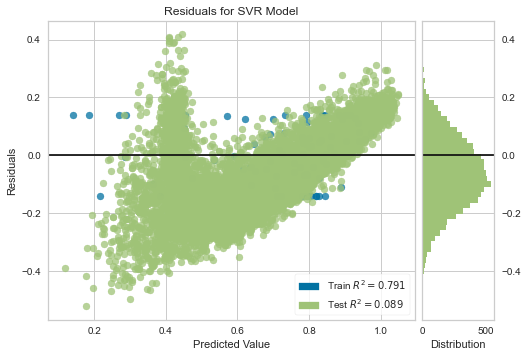

best parameters are:  {'C': 600, 'epsilon': 0.14, 'gamma': 0.001}
MSE: 0.02
R2 score: -0.03


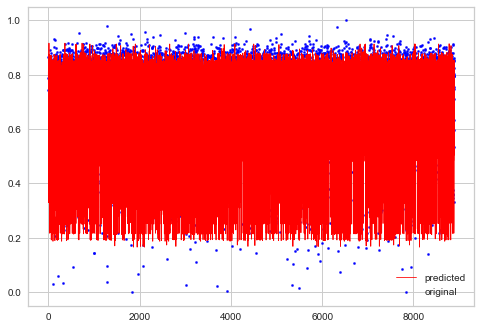

Begining Bagging Regressor
MSE: 0.03
R2 score: -0.19


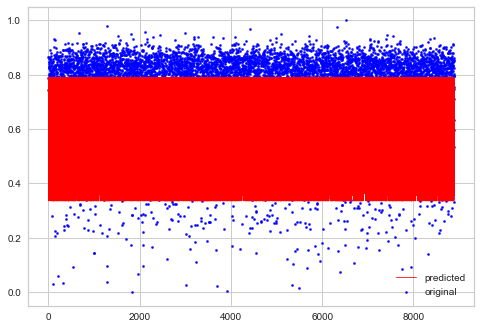

Forest Classifier (bonus?)


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from numpy import std
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import optunity
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

dfTrain = pd.read_csv("C:/Users/j4jan/Documents/SUNS/workspace/zadanie2/data/spotify_train.csv")
dfTest = pd.read_csv("C:/Users/j4jan/Documents/SUNS/workspace/zadanie2/data/spotify_test.csv")

# dfTrain.info()

dfTrain["explicit"] = dfTrain["explicit"].astype(int)
dfTest["explicit"] = dfTest["explicit"].astype(int)

sliced_text = slice(4)
dfTrain['release_date'] = dfTrain['release_date'].str[sliced_text].astype(int)
dfTest['release_date'] = dfTest['release_date'].str[sliced_text].astype(int)

mask = dfTrain.artist_genres.apply(lambda x: 'metal' in x)
df1 = dfTrain[mask]

mask2 = dfTest.artist_genres.apply(lambda x: 'metal' in x)
df2 = dfTest[mask2]
print(df1.artist_genres)


dfTrain["duration_ms"] = dfTrain["duration_ms"]/60000
properties = list(dfTrain.columns.values)
properties.remove("id")
properties.remove("artist_id")
properties.remove("artist")
properties.remove("name")
properties.remove("artist_genres")
properties.remove("artist_followers")
properties.remove("url")
properties.remove("playlist_id")
properties.remove("playlist_description")
properties.remove("playlist_name")
properties.remove("playlist_url")
properties.remove("query")

dfTrain.drop(dfTrain[(dfTrain['popularity'] < 70)].index, inplace=True)
dfTrain.drop(dfTrain[(dfTrain['liveness'] < 0.5)].index, inplace=True)

#NORMALIZOVANIE
min_max_scaler = MinMaxScaler()
dfTrain[properties] = min_max_scaler.fit_transform(dfTrain[properties])

min_max_scaler = MinMaxScaler()
dfTest[properties] = min_max_scaler.fit_transform(dfTest[properties])

#dfTrain[properties].info()

dfTrain[properties].duplicated().sum()

dfTrain[properties].drop_duplicates()

#KORELACNA MATICA

#corrMatrix = dfTrain[properties].corr()
#sn.heatmap(corrMatrix, annot=True)
#plt.show()

dfTrain.isna().sum()

#fig = px.strip(dfTrain[properties], x='energy', y='loudness')
#fig.show()

#sns.countplot(y="artist_genres", data=dfTrain, color='green')

#2 ULOHA SVM Regresor
##################################################

properties.remove('loudness')
properties.remove('release_date')
properties.remove('duration_ms')
properties.remove('key')
properties.remove('mode')
properties.remove('tempo')

print(properties)

X = dfTrain[properties]
y = dfTrain['loudness']

X_test = dfTest[properties]
y_test = dfTest['loudness']



# score function: twice iterated 10-fold cross-validated accuracy

# @optunity.cross_validated(x=X, y=y, num_folds=10, num_iter=2)
# def svm_mse(x_train, y_train, x_val, y_val, C, gamma):
#     model = SVR(C=C, gamma=gamma).fit(x_train, y_train)
#     y_pred = model.predict(X_test)
#     return optunity.metrics.mse(y_test, y_pred)


# # perform tuning

# optimal_pars, _, _ = optunity.minimize(
#     svm_mse, num_evals=200, C=[0, 10], gamma=[0, 1])

# train model on the full training set with tuned hyperparameters
# optimal_model = SVR(**optimal_pars).fit(X, y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)
clf = SVR(kernel='rbf', C=600, gamma='scale', epsilon=0.14)
clf.fit(X_train, y_train)
pred_y = clf.predict(X_train)
result2 = mean_squared_error(y_train, pred_y)
score = r2_score(y_train, pred_y)
crossValScore = cross_val_score(clf, X_train, y_train, cv=5)
print(clf)
print('MSE: ', result2)
print('r2 score: ',score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (crossValScore.mean(), crossValScore.std()))
from yellowbrick.regressor import ResidualsPlot

visualizer2 = ResidualsPlot(clf)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

#grid search

grid = GridSearchCV(

estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [1.1, 5.4, 170, 100, 300, 500, 600, 1001],
            'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05, 0.05, 0.5, 1, 8, 0.2, 3, 2, 7],
            'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid.fit(X_train,y_train)

#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)
# Suborove ucenie

# Boosting
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error').fit(X_train, y_train)

ypred = est.predict(X_test)

mse = mean_squared_error(y_test, ypred)
score = r2_score(y_test, ypred)

print("MSE: %.2f" % mse)
print("R2 score: %.2f" % score)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#Bagging reggresor
print('Begining Bagging Regressor')

# define the model
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                        n_estimators=100, random_state=0)
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
ypred = model.predict(X_test)
mse = mean_squared_error(y_test, ypred)
score = r2_score(y_test, ypred)

print("MSE: %.2f" % mse)
print("R2 score: %.2f" % score)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#forest classifier
print('Forest Classifier (bonus?)')
# define the model
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

from sklearn.metrics import accuracy_score

# rnd_clf = RandomForestClassifier(n_estimators=25, max_leaf_nodes=16, n_jobs=-1, random_state=1)
# rnd_clf.fit(X_train, training_scores_encoded)
# ypred = rnd_clf.predict(X_train)
# print(accuracy_score(y_train, ypred))

